In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import html 

from pathlib import Path
data = Path("../data")
plot_path = data / "plots"
map_path = data / "graph3_map"
stat_path = map_path / "stats"
geojson_path = map_path / "geojson"

# Animes dataset

In [2]:
animes = pd.read_csv(data / "AnimeList.csv")
print("Number of animes: {:,}".format(animes["anime_id"].nunique())) # same as number of rows
animes.head()

Number of animes: 14,478


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [3]:
# remove the rows with null studio
animes_clean = animes[animes["studio"].notnull()]
print("Number of animes: {:,}".format(animes_clean.shape[0]))

Number of animes: 8,544


Clean studios:
- For animes that have multiple studios, duplicate the entry for each studio
- Some studios have multiple names, we merge them
- Some studios have encoded names, we decode them, e.g. "Brain`&#039;`s Base" -> "Brain's Base"

In [4]:
num_animes = len(animes_clean["anime_id"])

# Apply html.unescape to the studio column
animes_clean["studio"] = animes_clean["studio"].apply(html.unescape)

# for the animes that have a "studio" column of the form "studio1, studio2, ..., studion", duplicate the anime n-1 times and assign the studio1, studio2, ..., studion to the new animes
animes_multiple_studios = animes_clean[animes_clean["studio"].str.contains(",")]
animes_multiple_studios.loc[
    :, "studio"
] = animes_multiple_studios.loc[:, "studio"].str.split(", ")
animes_multiple_studios = animes_multiple_studios.explode("studio")

# merge the results with the original dataframe
animes_clean = pd.concat(
    [
        animes_clean[~animes_clean["studio"].str.contains(",")],
        animes_multiple_studios,
    ],
    axis=0,
)
assert animes_clean["anime_id"].nunique() == num_animes

# strip all studios
animes_clean["studio"] = animes_clean["studio"].str.strip()

animes_clean.head()

/tmp/ipykernel_5858/177151676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animes_clean["studio"] = animes_clean["studio"].apply(html.unescape)
/tmp/ipykernel_5858/177151676.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animes_multiple_studios.loc[


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [5]:
# write animes_clean to csv
animes_clean.to_csv(data / "AnimeList_clean.csv", index=False)

In [7]:
# Sort animes_clean["studio"] by the alphabetical order IF THE NAME WERE ALL LOWERCASE
studios_db = sorted(animes_clean["studio"].unique(), key=lambda x: x.lower())

# write the list of unique studios in a file
with open(data / "studios_db.txt", "w") as f:
    for studio in studios_db:
        f.write(studio + "\n")

In [8]:
# Number of animes per studio
studio_num_animes = animes_clean.groupby(["studio"]).agg({"anime_id": "count"}).rename(columns={"anime_id": "num_animes"}).sort_values(by="num_animes", ascending=False)
studio_num_animes.to_csv(stat_path / "studio_num_animes.csv")

# Users dataset

In [9]:
users_country_aff = pd.read_csv(map_path / "users_country_aff.csv")
users_country_aff = users_country_aff[users_country_aff["country"] != "Japan"]
users_country_aff

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,country,country_aff
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0,India,India
1,K_P,6553594,32,419,15,3,122,181.52,Male,India,1998-02-06,NaN,2017-09-13,2018-05-14 22:22:07,9.05,140.0,11019.0,India,India
2,thomassimpsons,4778210,8,68,2,5,6,47.17,Male,"India,Mumbai",2000-08-16,NaN,2015-07-29,1900-04-14 06:46:00,6.63,0.0,2833.0,India,India
3,BLACK1189,6688908,2,220,2,0,4,67.40,Male,"india, kerala",1993-05-27,NaN,2017-10-29,1900-04-22 10:04:00,6.71,0.0,3998.0,India,India
4,Leon07,5037170,22,237,46,5,221,126.81,Male,Kerala,NaN,NaN,2015-12-07,1900-05-02 03:28:00,7.71,26.0,7698.0,India,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136040,prof_salt,4461555,6,240,12,6,349,81.15,Male,"Tarawa, Kiribati",1999-04-10,NaN,2015-02-09,1900-05-12 01:20:00,7.55,0.0,5080.0,Kiribati,Kiribati
136041,marijuanamoneyho,3662727,4,13,0,14,0,16.00,Male,Afghan,1930-01-01,NaN,2014-03-28,2014-07-03 14:28:00,7.03,0.0,957.0,Afghanistan,Afghanistan
136042,flora4u,224257,0,0,0,0,0,0.00,Female,dakar,1985-02-09,NaN,2009-08-22,2013-09-13 13:01:00,0.00,0.0,0.0,Senegal,Senegal
136043,kuranlover7891,303432,11,23,0,3,25,16.59,Female,"Nigeria, Benin",NaN,NaN,2010-03-11,2013-06-30 02:46:00,8.00,0.0,993.0,Benin,Benin


# Prepare data

## User-Animes


In [10]:
import dask.dataframe as dd

users_animes = dd.read_csv(data /
    "UserAnimeList.csv",
    dtype={
        "username": "object",
        "anime_id": "int64",
        "my_watched_episodes": "int64",
        "my_start_date": "str",
        "my_finish_date": "str",
        "my_score": "int64",
        "my_status": "int64",
        "my_rewatching": "float64",
        "my_rewatching_ep": "int64",
        "my_last_updated": "int64",
        "my_tags": "object",
    },
    usecols=[
        "username",
        "anime_id",
        "my_watched_episodes",
        "my_start_date",
        "my_finish_date",
        "my_score",
        "my_status",
        "my_rewatching",
        "my_rewatching_ep",
        "my_last_updated",
        "my_tags",
    ],
).persist()

users_animes

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
npartitions=78,,,,,,,,,,,
,object,int64,int64,object,object,int64,int64,float64,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


## User-Country

In [13]:
# convert users to dask dataframe
users_country = dd.from_pandas(users_country_aff[["username", "country"]], npartitions=1).persist()
users_country

,username,country
npartitions=1,,
0,object,object
136044,...,...


## User-Country-Animes

In [14]:
# Merge users_animes with users_country_aff
country_users_animes = users_country.merge(users_animes, on="username", how="inner").persist()
country_users_animes

,username,country,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
npartitions=78,,,,,,,,,,,,
,object,object,int64,int64,object,object,int64,int64,float64,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...


## Anime-Studios

In [15]:
animes_clean = dd.read_csv(data / "AnimeList_clean.csv").persist()

## User-Country-Animes-Studios

In [16]:
country_users_animes_studios = country_users_animes[["username","country","anime_id"]].merge(animes_clean[["anime_id", "studio"]], on="anime_id", how="inner").persist()
country_users_animes_studios

,username,country,anime_id,studio
npartitions=78,,,,
,object,object,int64,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


# Studio statistics

## Studio-Countries

In [17]:
# Creata a dataframe "studio_countries" that stores each unique (studio, country) pair
# Sort studio_countries by studio alphabetically, and then for each studio, sort the countries alphabetically
studio_countries = country_users_animes_studios[["studio", "country"]].drop_duplicates().compute().sort_values(["studio", "country"]).reset_index(drop=True)
studio_countries.to_csv(stat_path / "studio_countries.csv", index=False)
studio_countries

,studio,country
0,10Gauge,Albania
1,10Gauge,Argentina
2,10Gauge,Australia
3,10Gauge,Austria
4,10Gauge,Bahrain
...,...,...
53236,ufotable,Venezuela
53237,ufotable,Vietnam
53238,ufotable,Yemen
53239,ufotable,Zambia


## Studio-Country-Number of ratings for that studio in that country

In [31]:
studio_country_num_ratings = country_users_animes_studios.groupby(["studio", "country"]).agg({"username":"count"}).rename(columns={"username":"num_ratings"}).sort_values(["studio", "num_ratings"], ascending=[True, False]).reset_index()
studio_country_num_ratings.to_csv(stat_path / "studio_country_num_ratings.csv")
studio_country_num_ratings

,studio,country,num_ratings
npartitions=1,,,
,object,object,int64
,...,...,...


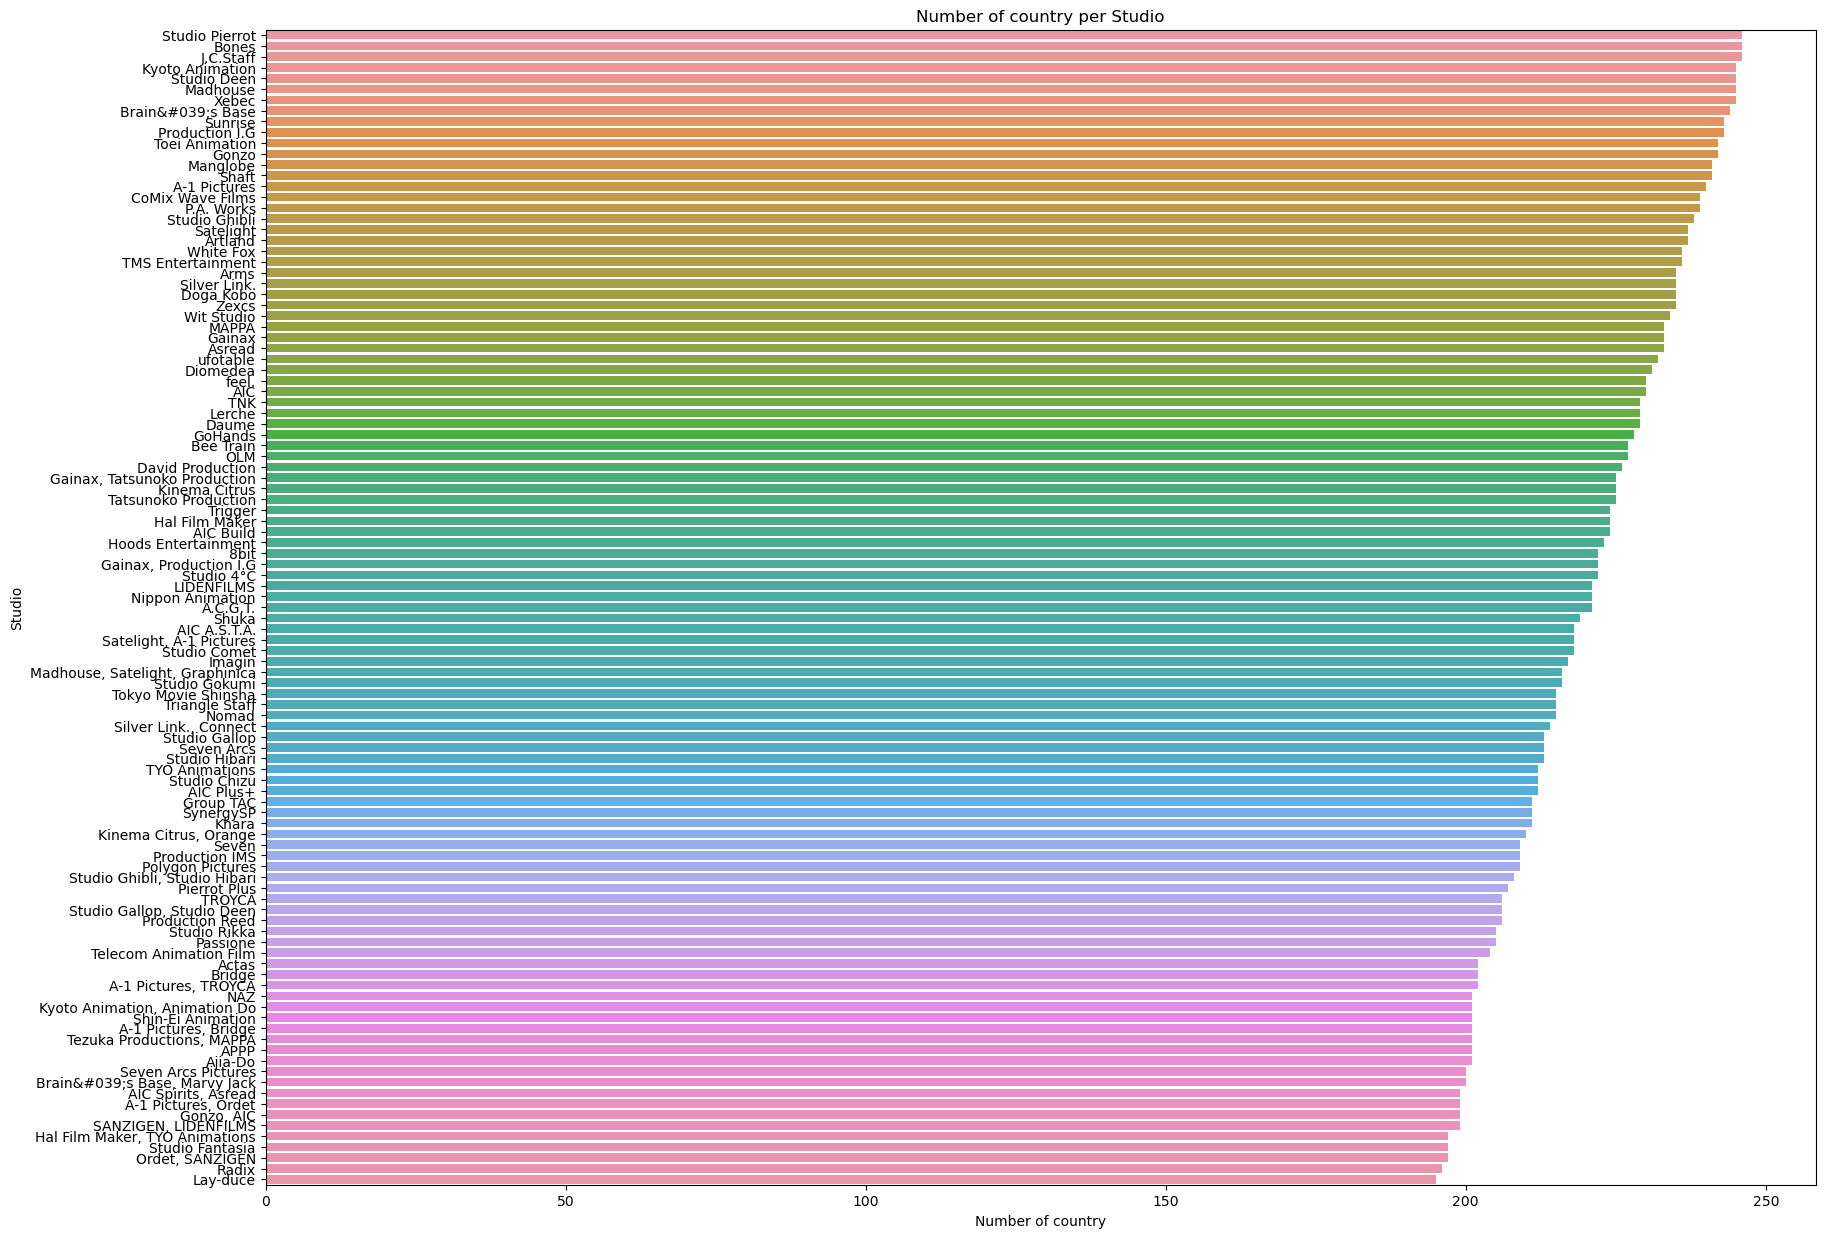

In [ ]:
plt.figure(figsize=(20, 15))
plot = sns.barplot(
    x="country",
    y="studio",
    data=df_studio_per_country[df_studio_per_country["country"] >= 195],
    order=df_studio_per_country[df_studio_per_country["country"] >= 195][
        "studio"
    ].unique(),
)
plt.title("Number of countries per studio")
plt.xlabel("Number of countries")
plt.ylabel("Studio")
plt.show()
plot.get_figure().savefig(plot_path / "studio_num_countries.png")

In [30]:
studio_country_num_ratings[studio_country_num_ratings["studio"] == "Madhouse"].head(10)

,studio,country,num_ratings
23334,Madhouse,United States,590398
23335,Madhouse,Poland,179063
23336,Madhouse,Brazil,165900
23337,Madhouse,Canada,142876
23338,Madhouse,United Kingdom,133452
23339,Madhouse,Russian Federation,124791
23340,Madhouse,Germany,96421
23341,Madhouse,France,74786
23342,Madhouse,Australia,70706
23343,Madhouse,Netherlands,60540


In [32]:
studio_country_num_ratings[studio_country_num_ratings["studio"] == "A-1 Pictures"].head(10)

,studio,country,num_ratings
505,A-1 Pictures,United States,403900
506,A-1 Pictures,Brazil,138862
507,A-1 Pictures,Poland,132138
508,A-1 Pictures,Canada,107665
509,A-1 Pictures,United Kingdom,97990
510,A-1 Pictures,Germany,72962
511,A-1 Pictures,Russian Federation,66768
512,A-1 Pictures,France,57768
513,A-1 Pictures,Australia,56754
514,A-1 Pictures,Indonesia,51756


In [34]:
studio_num_ratings = studio_country_num_ratings[["studio", "num_ratings"]].groupby(["studio"]).sum().reset_index().sort_values(by=["num_ratings"], ascending=False)
studio_num_ratings.to_csv(stat_path / "studio_num_ratings.csv")
studio_num_ratings.head(10)

,studio,num_ratings
224,Madhouse,2635980
179,J.C.Staff,2304099
6,A-1 Pictures,1953830
306,Production I.G,1751164
378,Studio Deen,1647169
425,Sunrise,1606246
454,Toei Animation,1563442
61,Bones,1449409
206,Kyoto Animation,1415080
406,Studio Pierrot,1290359


In [35]:
plt.figure(figsize=(20, 10))
plot = sns.barplot(
    x="num_ratings",
    y="studio",
    data=studio_num_ratings[studio_num_ratings["num_ratings"] >= 140000],
    order=studio_num_ratings[studio_num_ratings["num_ratings"] >= 140000][
        "studio"
    ].unique(),
)
plt.title("Number of ratings per studio")
plt.xlabel("Number of ratings")
plt.ylabel("Studio")
plt.show()
plot.get_figure().savefig(plot_path / "studio_num_ratings.png")

AttributeError: 'DataFrame' object has no attribute 'get'

<Figure size 2000x1000 with 0 Axes>